In [1]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#classification mono me to updated elliniko dataset. Train me to web scraping test me tin vasi postgres

train1 = pd.read_csv('../data/greek_web_scraping_emb.csv')
train2 = pd.read_csv('../data/cyprus_factcheck_emb.csv')
train3 = pd.read_csv('../data/fullfacts_emb.csv')
train4 = pd.read_csv('../data/snopes2_emb.csv', nrows=1000)
train5 = pd.read_csv('../data/reuters_emb.csv')

train1 = unravel_df(train1, ['text_embedding'])
train2 = unravel_df(train2, ['text_embedding'])
train3 = unravel_df(train3, ['text_embedding'])
train4 = unravel_df(train4, ['text_embedding'])
train5 = unravel_df(train5, ['text_embedding'])


test_df = pd.read_csv('../data/test1.csv')
test_df.rename(columns={'predict_label': 'label'}, inplace=True)
test_df = unravel_df(test_df, ['text_embedding'])

In [8]:
(train1.shape[0]+ train2.shape[0]+ test_df.shape[0])*5/100

40.15

In [59]:



X_train = [train1.iloc[i,2] for i in range(len(train1))]
y_train =  np.array(train1.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)

In [4]:
# NaiveBayes(X_train, X_test, y_train, y_test)

In [5]:
# LogisticReg(X_train, X_test, y_train, y_test)

In [6]:
# SVM(X_train, X_test, y_train, y_test)

In [7]:
# KNeigh(X_train, X_test, y_train, y_test)

In [8]:
# DecisionTree(X_train, X_test, y_train, y_test)

In [9]:
# RandomForest(X_train, X_test, y_train, y_test)

Model Accuracy: 0.466

Model Recall: 0.466

Model Precision: 0.418

Model F1-Score: 0.44

Cross validation score: [0.981 0.962 0.943 1.    1.    0.981 1.    0.981 0.962 0.962]

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53        79
           1       0.40      0.52      0.45        52
           2       0.00      0.00      0.00        17

    accuracy                           0.47       148
   macro avg       0.31      0.35      0.33       148
weighted avg       0.42      0.47      0.44       148




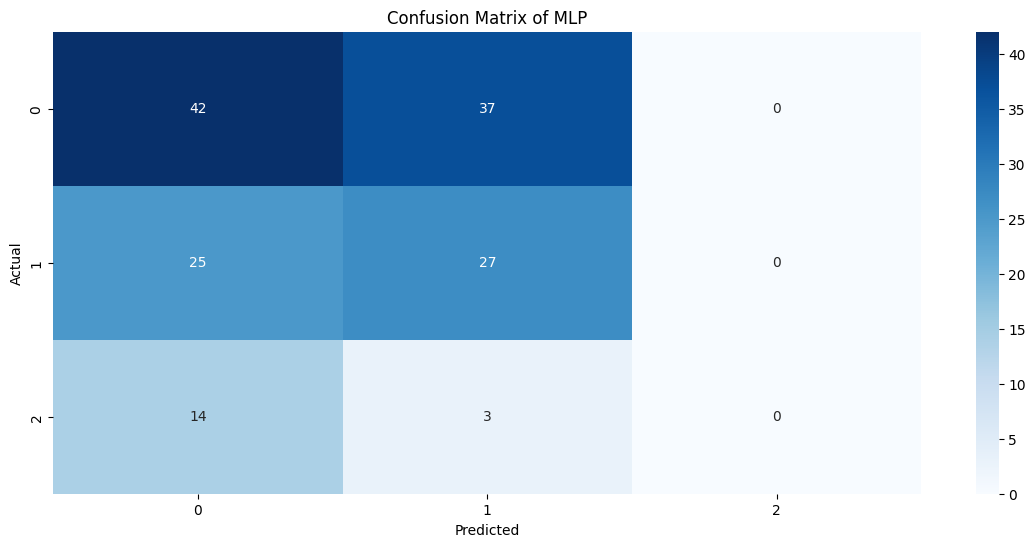

In [60]:
MLP(X_train, X_test, y_train, y_test)

In [61]:
#we proceed to add the factcheckcyprus data
df_train = pd.concat([train2,train1], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)


Model Accuracy: 0.439

Model Recall: 0.439

Model Precision: 0.403

Model F1-Score: 0.414

Cross validation score: [0.742 0.924 0.955 0.97  0.924 1.    0.969 0.969 0.985 0.954]

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48        79
           1       0.38      0.56      0.45        52
           2       0.00      0.00      0.00        17

    accuracy                           0.44       148
   macro avg       0.29      0.34      0.31       148
weighted avg       0.40      0.44      0.41       148




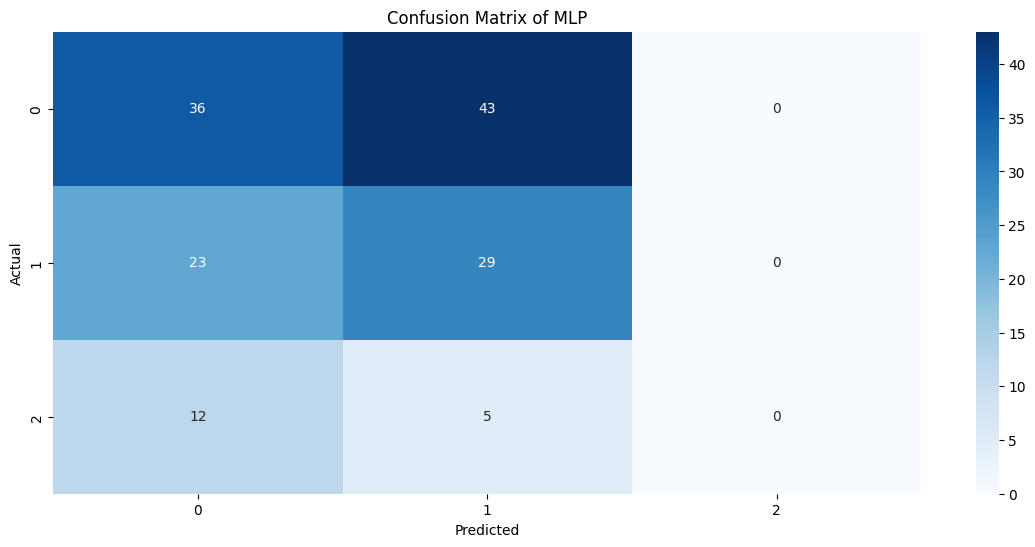

In [62]:
MLP(X_train, X_test, y_train, y_test)

Model Accuracy: 0.432

Model Recall: 0.432

Model Precision: 0.393

Model F1-Score: 0.411

Cross validation score: [0.806 0.806 0.759 0.784 0.832 0.826 0.753 0.763 0.721 0.732]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51        79
           1       0.36      0.44      0.40        52
           2       0.00      0.00      0.00        17

    accuracy                           0.43       148
   macro avg       0.29      0.32      0.30       148
weighted avg       0.39      0.43      0.41       148




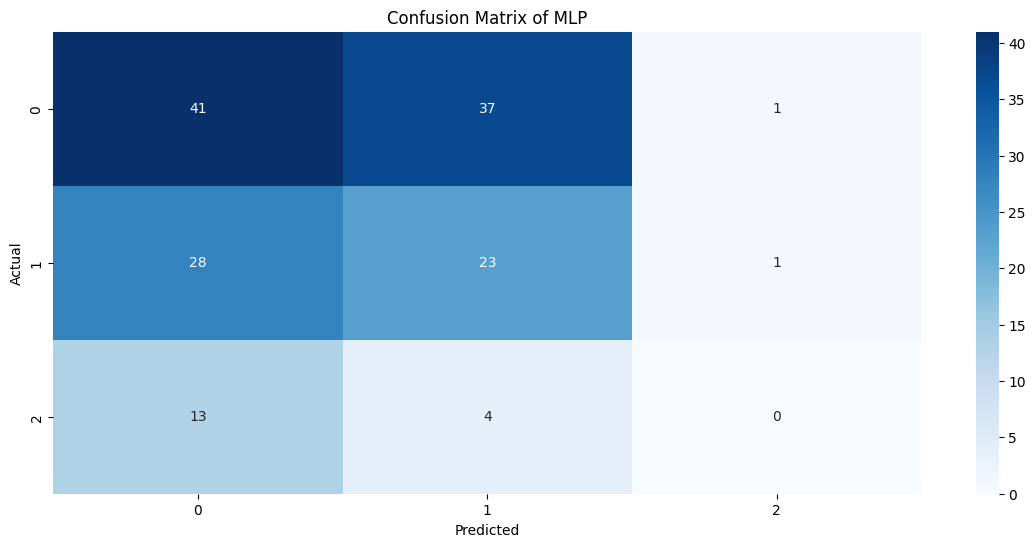

0.0    1345
1.0     321
2.0     237
Name: label, dtype: int64


In [63]:
#we proceed to add only the fullfacts data
train3.dropna(inplace=True)
train3.reset_index(drop=True, inplace=True)
df_train = pd.concat([train1,train3], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
MLP(X_train, X_test, y_train, y_test)
print(df_train.label.value_counts())


0.0    734
1.0    546
2.0      5
Name: label, dtype: int64
Model Accuracy: 0.392

Model Recall: 0.392

Model Precision: 0.372

Model F1-Score: 0.366

Cross validation score: [0.822 0.899 0.868 0.767 0.845 0.734 0.594 0.602 0.586 0.609]

Classification report:
               precision    recall  f1-score   support

           0       0.47      0.35      0.41        79
           1       0.34      0.58      0.43        52
           2       0.00      0.00      0.00        17

    accuracy                           0.39       148
   macro avg       0.27      0.31      0.28       148
weighted avg       0.37      0.39      0.37       148




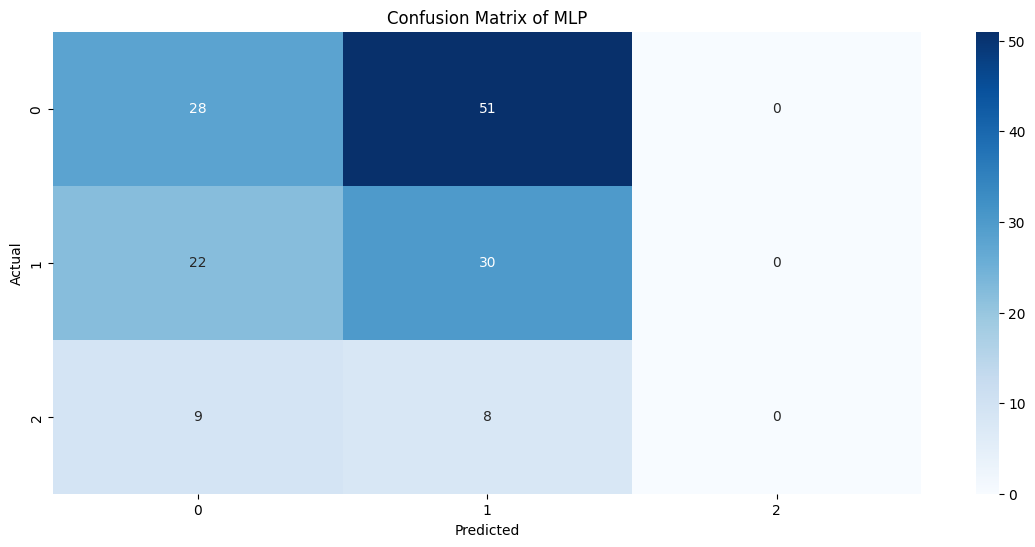

In [64]:
#we proceed to add the snopes data
train4.dropna(inplace=True)
train4.reset_index(drop=True, inplace=True)
df_train = pd.concat([train1,train4], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1860
1.0     938
2.0     242
Name: label, dtype: int64
Model Accuracy: 0.426

Model Recall: 0.426

Model Precision: 0.407

Model F1-Score: 0.401

Cross validation score: [0.816 0.763 0.822 0.671 0.579 0.543 0.809 0.747 0.724 0.73 ]

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.39      0.45        79
           1       0.37      0.62      0.46        52
           2       0.00      0.00      0.00        17

    accuracy                           0.43       148
   macro avg       0.30      0.34      0.30       148
weighted avg       0.41      0.43      0.40       148




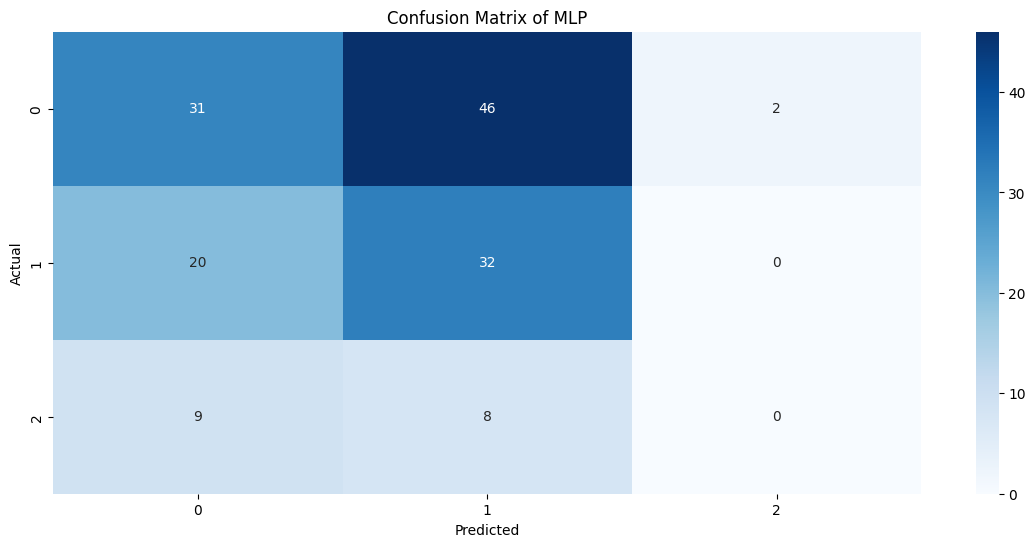

In [65]:
#we proceed to add the snopes, reuters and fullfact data
df_train = pd.concat([train1,train3,train4,train5], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1860
1.0     560
2.0     242
Name: label, dtype: int64
Model Accuracy: 0.426

Model Recall: 0.426

Model Precision: 0.398

Model F1-Score: 0.407

Cross validation score: [0.775 0.734 0.797 0.812 0.793 0.684 0.647 0.59  0.647 0.635]

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49        79
           1       0.35      0.50      0.41        52
           2       0.00      0.00      0.00        17

    accuracy                           0.43       148
   macro avg       0.29      0.32      0.30       148
weighted avg       0.40      0.43      0.41       148




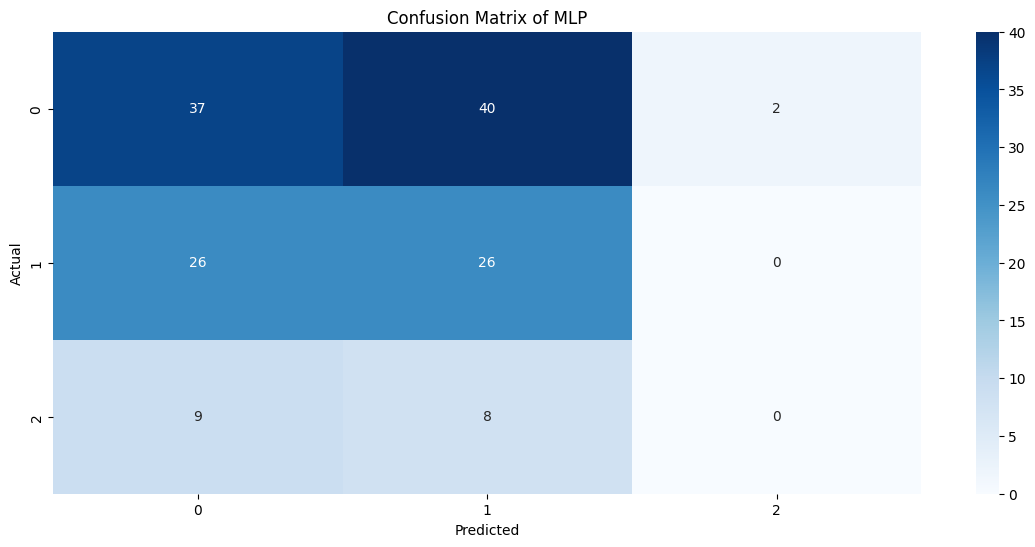

In [66]:
#we proceed to add the fullfact and snopes data
df_train = pd.concat([train1,train3,train4], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1860
1.0     938
2.0     242
Name: label, dtype: int64
Model Accuracy: 0.426

Model Recall: 0.426

Model Precision: 0.407

Model F1-Score: 0.401

Cross validation score: [0.816 0.763 0.822 0.671 0.579 0.543 0.809 0.747 0.724 0.73 ]

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.39      0.45        79
           1       0.37      0.62      0.46        52
           2       0.00      0.00      0.00        17

    accuracy                           0.43       148
   macro avg       0.30      0.34      0.30       148
weighted avg       0.41      0.43      0.40       148




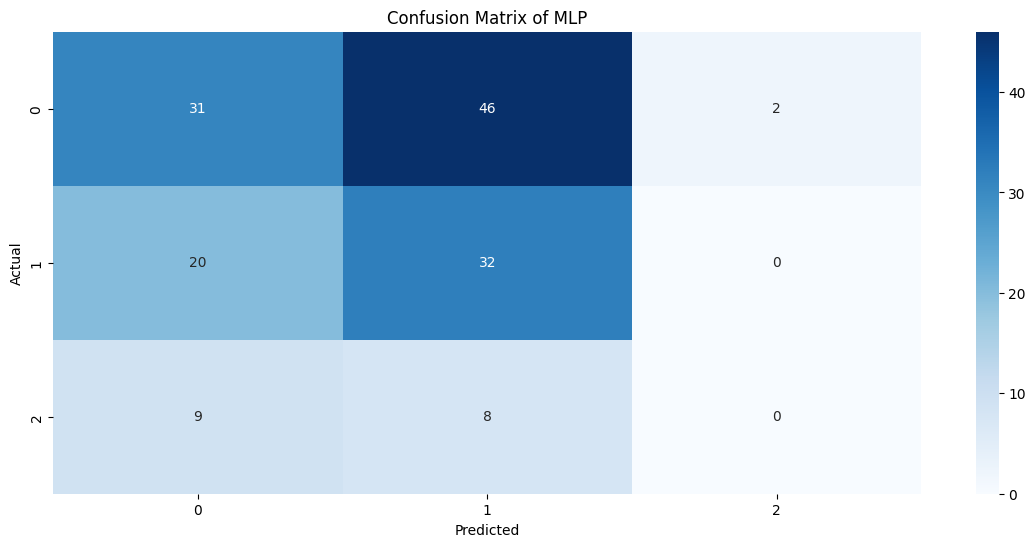

In [3]:
#we proceed to add the fullfact, snopes and reuters data
df_train = pd.concat([train1,train3,train4,train5], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1429
1.0     366
2.0     237
Name: label, dtype: int64


Model Accuracy: 0.378

Model Recall: 0.378

Model Precision: 0.348

Model F1-Score: 0.36

Cross validation score: [0.824 0.784 0.734 0.803 0.808 0.803 0.744 0.788 0.729 0.744]

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44        79
           1       0.31      0.42      0.36        52
           2       0.00      0.00      0.00        17

    accuracy                           0.38       148
   macro avg       0.25      0.28      0.27       148
weighted avg       0.35      0.38      0.36       148




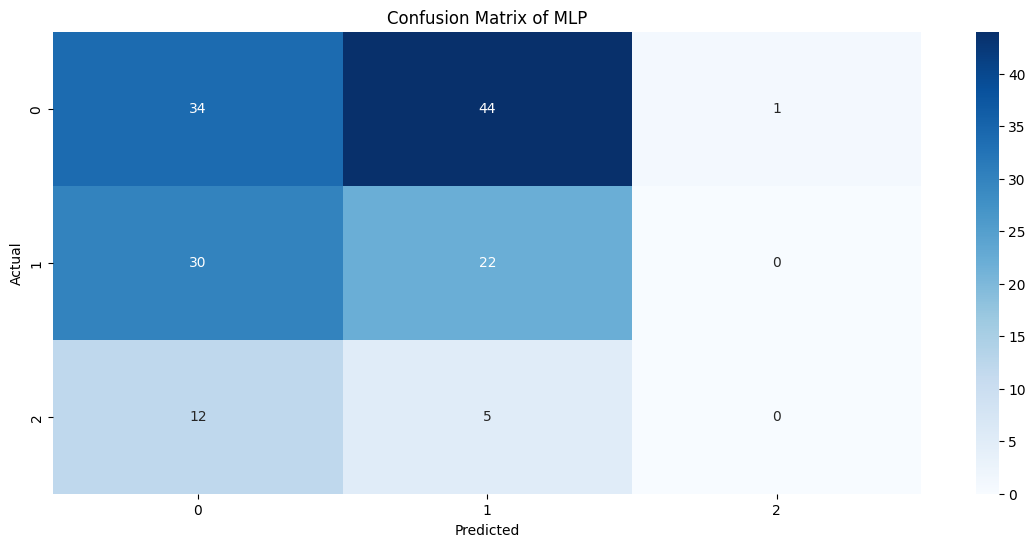

In [67]:
#we proceed to add the fullfact and cyprus data
df_train = pd.concat([train1,train2,train3], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1944
1.0     605
2.0     242
Name: label, dtype: int64
Model Accuracy: 0.372

Model Recall: 0.372

Model Precision: 0.355

Model F1-Score: 0.354

Cross validation score: [0.764 0.742 0.774 0.799 0.792 0.588 0.624 0.606 0.627 0.602]

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.38      0.42        79
           1       0.31      0.48      0.38        52
           2       0.00      0.00      0.00        17

    accuracy                           0.37       148
   macro avg       0.26      0.29      0.26       148
weighted avg       0.35      0.37      0.35       148




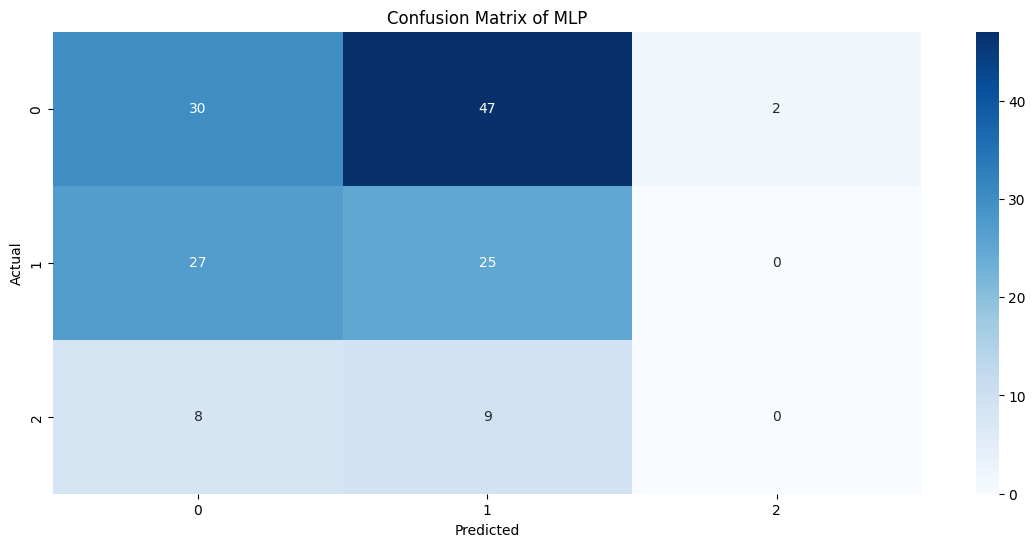

In [68]:
#we proceed to add the fullfact, snopes and cyprus data
df_train = pd.concat([train1,train2,train3, train4], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)

0.0    1944
1.0     983
2.0     242
Name: label, dtype: int64


Model Accuracy: 0.399

Model Recall: 0.399

Model Precision: 0.388

Model F1-Score: 0.369

Cross validation score: [0.798 0.773 0.798 0.625 0.64  0.527 0.748 0.744 0.716 0.741]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40        79
           1       0.34      0.63      0.45        52
           2       0.00      0.00      0.00        17

    accuracy                           0.40       148
   macro avg       0.28      0.32      0.28       148
weighted avg       0.39      0.40      0.37       148




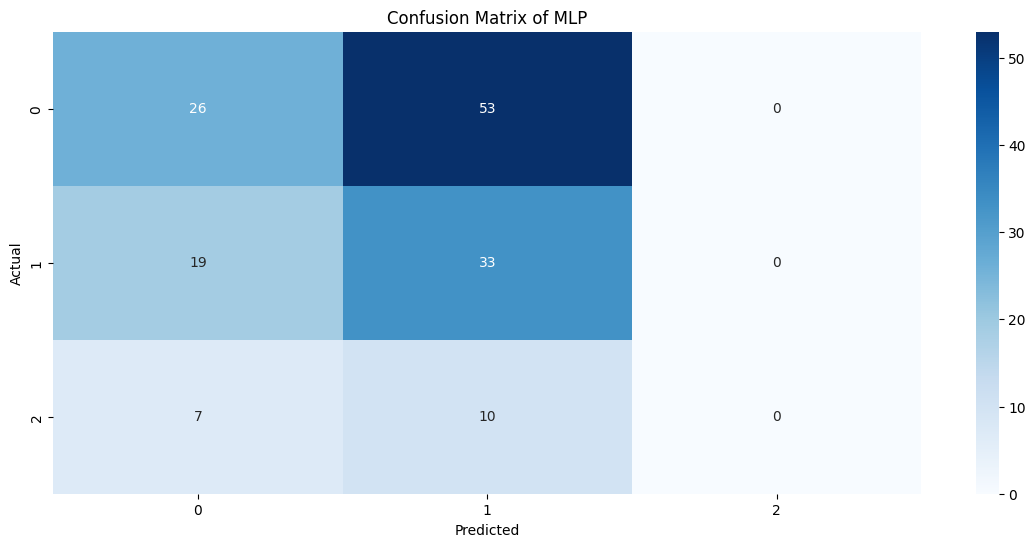

In [69]:
#we proceed to add the fullfact, snopes and cyprus, reuters data
df_train = pd.concat([train1,train2,train3, train4, train5], ignore_index=True)
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)
X_train = [df_train.iloc[i,2] for i in range(len(df_train))]
y_train =  np.array(df_train.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)
print(df_train.label.value_counts())
MLP(X_train, X_test, y_train, y_test)